# Ch2: 2.2.6 Linear Discriminant Analysis (LDA)




In [1]:
import numpy as np
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dataset['Class'].unique() # array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
from sklearn import preprocessing

# lbl_encoder object knows how to understand word labels.
lbl_encoder = preprocessing.LabelEncoder()

dataset['Class']= lbl_encoder.fit_transform(dataset['Class'])
dataset['Class'].unique()

array([0, 1, 2])

In [5]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Data Preprocessing: assigns the first four columns of the dataset i.e. the feature set to X variable while the values in the fifth column (labels) are assigned to the y variable.

In [6]:
#X = dataset.iloc[:, 0:4].values
#y = dataset.iloc[:, 4].values
X = dataset.drop('Class', 1)
y = dataset['Class']
print (X.shape)
print (y.shape)

(150, 4)
(150,)


C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_7060/120526215.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop('Class', 1)


divide the data into training and test sets:

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Scaling

As was the case with PCA, we need to perform feature scaling for LDA too. Execute the following script to do so:

In [8]:
print ("X_train shape = ", X_train.shape)
print ("X_test shape = ", X_test.shape)
print ("y_train shape = ", y_train.shape)
print ("y_test shape = ", y_test.shape)

X_train shape =  (120, 4)
X_test shape =  (30, 4)
y_train shape =  (120,)
y_test shape =  (30,)


In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Applying PCA for comparison:
PCA depends only upon the feature set and not the label data. Therefore, PCA can be considered as an unsupervised machine learning technique.

Performing PCA using Scikit-Learn is a two-step process:

Initialize the PCA class by passing the number of components to the constructor.
Call the fit and then transform methods by passing the feature set to these methods. The transform method returns the specified number of principal components.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

print ("X_train shape = ", X_train.shape)
print ("X_test shape = ", X_test.shape)
print ("y_train shape = ", y_train.shape)
print ("y_test shape = ", y_test.shape)

print ("PCA_X_train shape = ", pca_X_train.shape)
print ("PCA_X_test shape = ", pca_X_test.shape)


X_train shape =  (120, 4)
X_test shape =  (30, 4)
y_train shape =  (120,)
y_test shape =  (30,)
PCA_X_train shape =  (120, 3)
PCA_X_test shape =  (30, 3)


## The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis library can be used to Perform LDA in Python. Like PCA, we have to pass the value for the n_components parameter of the LDA, which refers to the number of linear discriminates that we want to retrieve. In this case we set the n_components to 2, since the dataset has three classes , and need 2 linear discriminants, and LDA requires n_components not to be larger than min(n_features, n_classes - 1). Finally we execute the fit and transform methods to actually retrieve the linear discriminants.

Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. However in the case of PCA, the transform method only requires one parameter i.e. X_train. This reflects the fact that supervised LDA takes the output class labels into account while selecting the linear discriminants, while unsupervised PCA doesn't depend upon the output labels.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
lda.fit(X_train, y_train)
LDA_X_train = lda.transform(X_train)
LDA_X_test = lda.transform(X_test)

print ("X_train shape = ", X_train.shape)
print ("X_test shape = ", X_test.shape)
print ("y_train shape = ", y_train.shape)
print ("y_test shape = ", y_test.shape)

print ("LDA_X_train shape = ", LDA_X_train.shape)
print ("LDA_X_test shape = ", LDA_X_test.shape)


X_train shape =  (120, 4)
X_test shape =  (30, 4)
y_train shape =  (120,)
y_test shape =  (30,)
LDA_X_train shape =  (120, 2)
LDA_X_test shape =  (30, 2)


Training and Making Predictions
Since we want to compare the performance of LDA with one linear discriminant to the performance of PCA with one principal component, we will use the same Random Forest classifier that we used to evaluate performance of PCA-reduced algorithms.

In [12]:
from sklearn.ensemble import RandomForestClassifier

lda_classifier = RandomForestClassifier(max_depth=2, random_state=0)

lda_classifier.fit(LDA_X_train, y_train)
lda_y_pred = lda.predict(X_test)

pca_classifier = RandomForestClassifier(max_depth=2, random_state=0)

pca_classifier.fit(pca_X_train, y_train)
pca_y_pred = pca_classifier.predict(pca_X_test)

Evaluating the Performance
As always, the last step is to evaluate performance of the algorithm with the help of a confusion matrix and find the accuracy of the prediction.

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

lda_cm = confusion_matrix(y_test, lda_y_pred)
print('LDA Confusion Matrix') 
print(lda_cm)
print('LDA Accuracy' + str(accuracy_score(y_test, lda_y_pred)))


pca_cm = confusion_matrix(y_test, pca_y_pred)
print('PCA Confusion Matrix') 
print(pca_cm)
print('Accuracy' + str(accuracy_score(y_test, pca_y_pred)))

LDA Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
LDA Accuracy1.0
PCA Confusion Matrix
[[11  0  0]
 [ 0  8  5]
 [ 0  1  5]]
Accuracy0.8


compare plotting the projection spaces of both methods

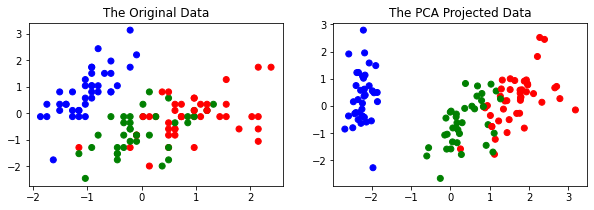

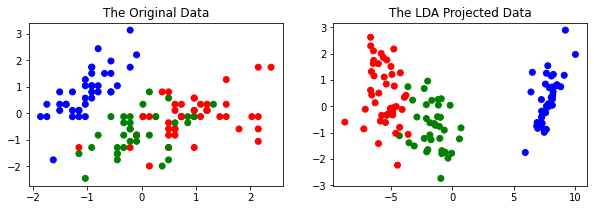

In [14]:
import matplotlib.pyplot as plt

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
label_color = [colors[l] for l in y_train]


# Comparing before and after PCA, for the first two features only
fig = plt.figure( figsize=(10,3))
plt.subplot(1,2,1)
plt.scatter(X_train[:,0],X_train[:,1], marker='o', c=label_color)
plt.title("The Original Data")

plt.subplot(1,2,2)
plt.scatter(pca_X_train[:,0],pca_X_train[:,1], marker='o', c=label_color)
plt.title("The PCA Projected Data")
plt.show()

# Comparing before and after LDA, for the first two features only
fig = plt.figure( figsize=(10,3))
plt.subplot(1,2,1)
plt.scatter(X_train[:,0],X_train[:,1], marker='o', c=label_color)
plt.title("The Original Data")

plt.subplot(1,2,2)
plt.scatter(LDA_X_train[:,0],LDA_X_train[:,1], marker='o', c=label_color)
plt.title("The LDA Projected Data")
plt.show()